In [ ]:
# don't run this ver, run the one in svd repo

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/pio/scratch/1/i313924/OPUS/funk-svd/')
import funk_svd_mod
from sklearn.decomposition import PCA
from scipy import spatial
from tqdm.auto import tqdm

In [37]:
model = pd.read_pickle('/pio/scratch/1/i313924/data/svd_data/model_100_epochs_regularized_no_error.pkl')

## ABX

In [38]:
abx_tests = pd.read_json('/pio/scratch/1/i313924/data/test_data/test_ABX_weighted_slim.json', lines=True)

In [39]:
def get_item_embedding(model, asin):
    item_id = model.item_mapping_[asin]
    return model.qi_[item_id]

In [40]:
A = np.zeros((10000, 100))
B = np.zeros((10000, 100))
X = np.zeros((10000, 100))

In [41]:
for i, test in tqdm(abx_tests.iterrows()):
    A[i, :] = get_item_embedding(model, test["A"])
    B[i, :] = get_item_embedding(model, test["B"])
    X[i, :] = get_item_embedding(model, test["X"])

0it [00:00, ?it/s]

In [42]:
dist_A = ((A - X)**2).sum(axis=1)
dist_B = ((B - X)**2).sum(axis=1)

In [43]:
(dist_A < dist_B).mean()

0.5124

In [44]:
cos_dist_A = np.zeros(10000)
cos_dist_B = np.zeros(10000)
for i in tqdm(range(10000)):
    cos_dist_A[i] = spatial.distance.cosine(A[i, :], X[i, :])
    cos_dist_B[i] = spatial.distance.cosine(B[i, :], X[i, :])

  0%|          | 0/10000 [00:00<?, ?it/s]

In [45]:
(cos_dist_A < cos_dist_B).mean()

0.5029

## Embeddings PCA

In [46]:
item_embeddings = pd.DataFrame(model.qi_)
user_embeddings = pd.DataFrame(model.pu_)

In [47]:
item_embeddings 

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.002345,0.168542,-0.122199,-0.034567,0.011738,0.093570,-0.106655,-0.098916,0.009819,-0.159624,...,0.010380,0.049560,-0.032905,0.180140,0.010896,0.063059,-0.122439,0.020626,-0.056390,-0.088927
1,0.126140,0.069822,0.031454,-0.120584,0.056236,-0.055484,-0.013140,-0.085192,0.065871,0.147193,...,-0.184317,-0.146402,0.118741,-0.128019,-0.151379,-0.052998,0.039001,0.124003,-0.094882,-0.149498
2,0.041244,-0.005047,-0.172274,0.082413,-0.075338,-0.201660,0.059266,-0.168551,0.070048,-0.160231,...,0.003093,-0.188079,-0.051666,0.002892,-0.097966,0.065293,0.026041,-0.073477,-0.119228,0.073770
3,-0.192951,0.029082,-0.144747,0.216524,0.018852,-0.036481,0.009974,-0.028882,-0.140254,0.107352,...,-0.007527,0.044857,0.125605,-0.245527,0.060714,-0.109672,0.156700,-0.059880,-0.083382,0.111259
4,0.200732,0.153014,-0.028792,0.061618,0.137155,-0.001064,-0.110184,0.131971,0.063576,0.073206,...,0.034957,-0.028461,0.046377,-0.148318,-0.144905,0.053592,0.145343,-0.081473,-0.234802,0.076388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206491,-0.057950,0.080160,-0.018192,0.009321,0.019610,0.101284,0.112396,0.222904,-0.004110,0.176047,...,-0.051949,0.047734,0.067163,0.093550,-0.010539,0.008131,-0.040693,0.018071,-0.070412,0.088078
206492,-0.100712,-0.274413,0.134623,0.009746,0.029805,-0.098112,-0.015608,0.048614,-0.021645,0.257754,...,0.011511,0.130013,0.021548,-0.045011,0.001061,-0.032837,0.045883,0.194084,0.047184,0.058950
206493,-0.046709,-0.035363,0.032675,-0.116358,-0.202218,-0.042708,0.170580,-0.007893,0.025977,0.071264,...,0.049870,-0.054739,-0.094345,0.137018,-0.059283,0.067057,0.012663,0.086373,-0.040616,-0.175849
206494,0.085457,-0.101148,-0.060335,-0.051311,0.042317,-0.084700,0.007912,0.102355,0.117897,-0.106631,...,-0.254003,-0.101660,-0.121600,0.087480,-0.084486,0.052246,-0.082491,0.007445,0.004301,-0.075500


In [48]:
embeddings = pd.concat([item_embeddings, user_embeddings], keys=['items', 'users'])

In [49]:
pca = PCA(n_components=2)
pca.fit(embeddings)

PCA(n_components=2)

In [50]:
reduced_item_embeddings = pd.DataFrame(pca.transform(embeddings.loc["items"]))
reduced_user_embeddings = pd.DataFrame(pca.transform(embeddings.loc["users"]))

In [51]:
reduced_item_embeddings

,0,1
0,-0.036844,0.078667
1,0.059815,-0.041878
2,-0.084471,-0.090171
3,0.126884,-0.017616
4,0.156098,-0.066659
...,...,...
206491,-0.095086,0.040106
206492,0.086781,0.045637
206493,-0.027795,0.023041
206494,-0.046866,0.127051


In [52]:
reduced_user_embeddings

,0,1
0,0.067541,-0.004476
1,-0.063349,0.036052
2,0.097358,-0.202843
3,0.116637,-0.008208
4,0.202833,-0.030647
...,...,...
101039,-0.033211,-0.103909
101040,-0.024305,0.048179
101041,-0.068177,0.048828
101042,0.199664,0.048145


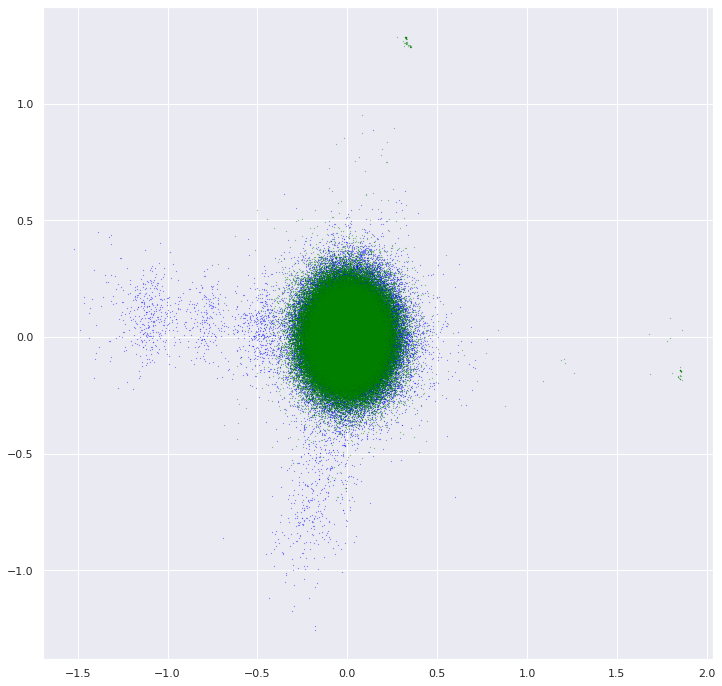

In [53]:
plt.figure(figsize=(12, 12))
plt.scatter(reduced_user_embeddings[0], reduced_user_embeddings[1], c='blue', s=0.03)
plt.scatter(reduced_item_embeddings[0], reduced_item_embeddings[1], c='green', s=0.03)

In [54]:
item_mapping = {v: k for k, v in model.item_mapping_.items()}
user_mapping = {v: k for k, v in model.user_mapping_.items()}

In [55]:
reduced_item_embeddings = reduced_item_embeddings.rename(index=item_mapping)

In [56]:
categories = pd.read_json('/pio/scratch/1/recommender_systems/interim/Amazon/meta_Clothing_Shoes_and_Jewelry_categories.json', lines=True)

In [57]:
reduced_item_embeddings = reduced_item_embeddings.join(categories.set_index('asin'))

In [58]:
reduced_item_embeddings.columns = ['0', '1', 'category_1', 'category_2']

<AxesSubplot:xlabel='0', ylabel='1'>

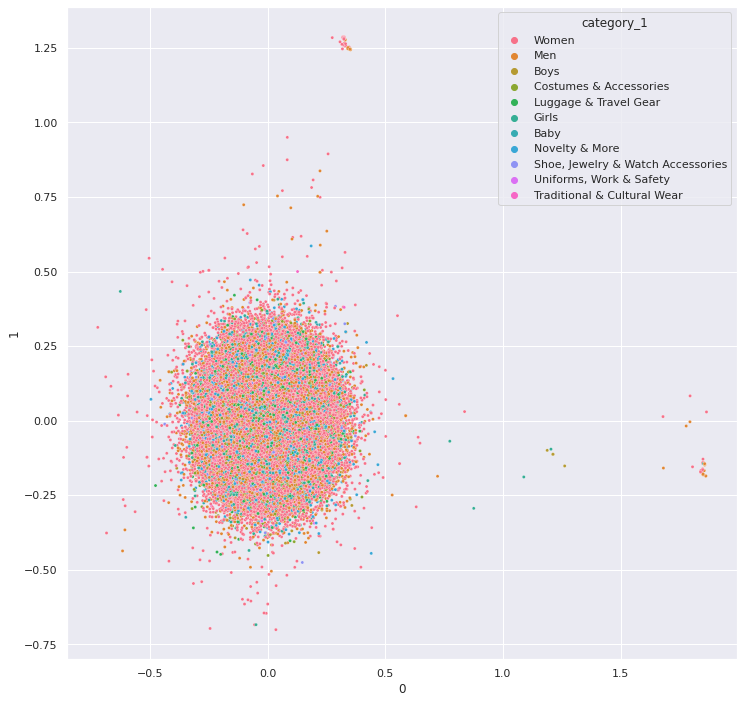

In [59]:
sns.set(rc={'figure.figsize':(12,12)})
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings, hue='category_1', s=10)

<AxesSubplot:xlabel='0', ylabel='1'>

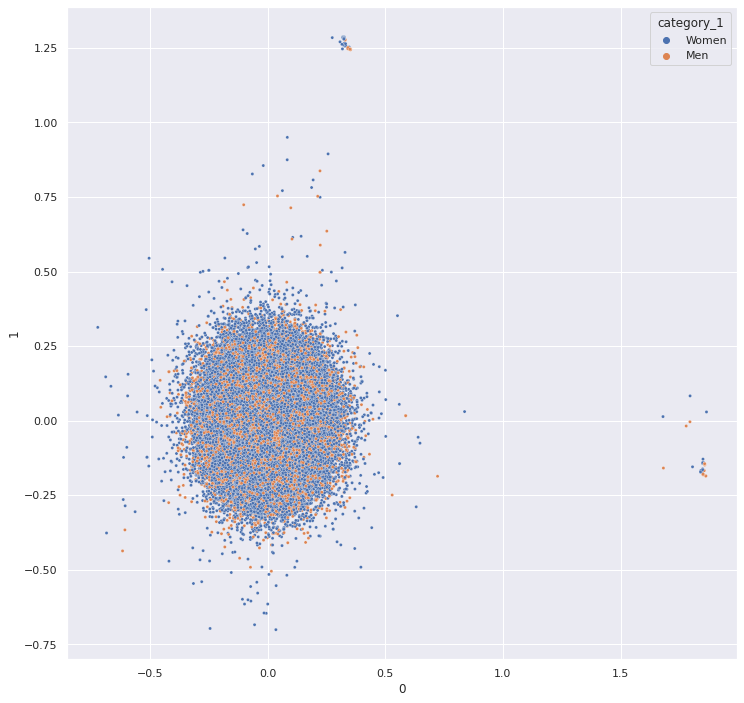

In [60]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Women', 'Men'])], hue='category_1', s=10)

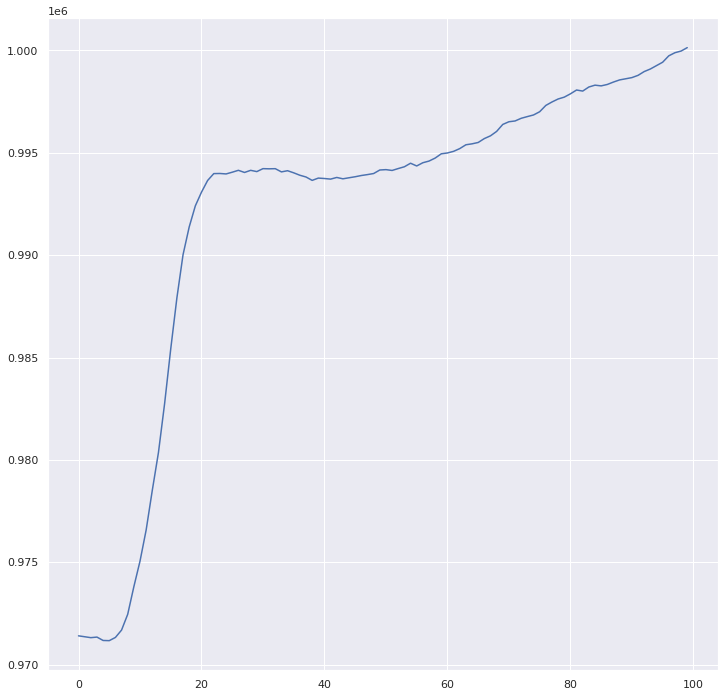

In [63]:
with open('/pio/scratch/1/i313924/data/svd_data/num_regularized_no_error', 'r') as f_in:
    content = list(map(int, f_in.read().split()))
    plt.plot(content)